In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
from pathlib import Path
def count_files_and_folders(path):
    return sum(1 for _ in Path(path).rglob('*'))
folder_path = r'C:\Users\Tanvi\Desktop\COLLEGE\Hunar Intern\train\cats'
print(f"Total files and folders: {count_files_and_folders(folder_path)}")

Total files and folders: 10000


In [14]:
from pathlib import Path
def count_files_and_folders(path):
    return sum(1 for _ in Path(path).rglob('*'))
folder_path = r'C:\Users\Tanvi\Desktop\COLLEGE\Hunar Intern\train\dogs'
print(f"Total files and folders: {count_files_and_folders(folder_path)}")

Total files and folders: 10000


In [19]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D , Flatten , Dense , MaxPooling2D , Dropout

In [26]:
import pathlib
data_dir = pathlib.Path(r'C:\Users\Tanvi\Desktop\COLLEGE\Hunar Intern\train')

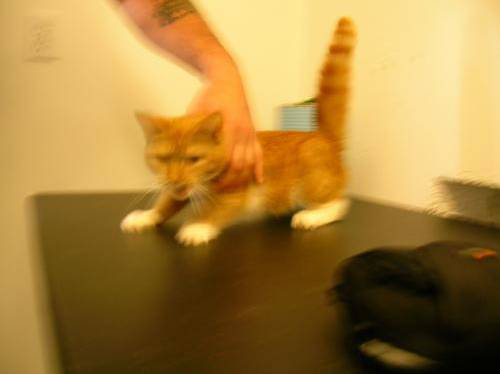

In [34]:
import PIL
cats = list(data_dir.glob('cats/*.jpg'))
PIL.Image.open(cats[0])

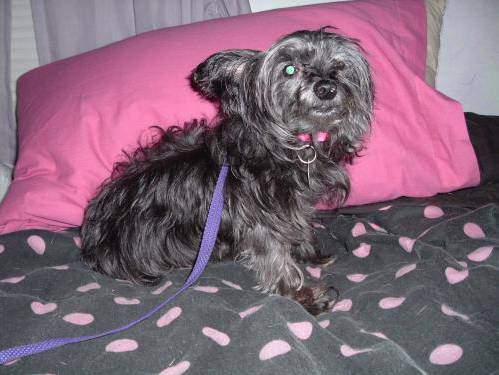

In [36]:
dogs = list(data_dir.glob('dogs/*.jpg'))
PIL.Image.open(dogs[0])

In [38]:
animal_dict_folder = {
'cats':list(data_dir.glob('cats/*.jpg')),
'dogs':list(data_dir.glob('dogs/*.jpg'))
}

In [40]:
 animal_labels_dict = {
'cats':0,
'dogs':1
}

In [44]:
import cv2
img = cv2.imread(cats[0])
img.shape

(374, 500, 3)

In [46]:
X , y =[] , []
for image in list(data_dir.glob('cats/*.jpg')):
    img = cv2.imread(image)
    resized_img = cv2.resize(img , (100,100))
    X.append(resized_img)
    y.append(0)

In [47]:
for image in list(data_dir.glob('dogs/*.jpg')):
    img = cv2.imread(image)
    resized_img = cv2.resize(img , (100,100))
    X.append(resized_img)
    y.append(1)

In [50]:
X = np.array(X)
y = np.array(y)

In [52]:
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size=0.2,random_state=42)

In [54]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [56]:
model = Sequential([
    Conv2D(32,3,padding='same' , activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(64 , 3 , padding='same' , activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128 , 3 , padding='same' , activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128 , activation='relu'),
    Dense(1 ,activation='softmax')
])

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled , y_train , epochs=10)

Epoch 1/10


C:\Users\Tanvi\anaconda4\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


500/500 ━━━━━━━━━━━━━━━━━━━━ 84s 163ms/step - accuracy: 0.4993 - loss: 0.6712
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 91s 182ms/step - accuracy: 0.4973 - loss: 0.5275
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 89s 178ms/step - accuracy: 0.5042 - loss: 0.4700
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 86s 172ms/step - accuracy: 0.5008 - loss: 0.4144
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 95s 190ms/step - accuracy: 0.4967 - loss: 0.3686
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 90s 179ms/step - accuracy: 0.4988 - loss: 0.3339
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 87s 173ms/step - accuracy: 0.5017 - loss: 0.2889
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 88s 177ms/step - accuracy: 0.4988 - loss: 0.2461
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 83s 165ms/step - accuracy: 0.4956 - loss: 0.2190
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 96s 193ms/step - accuracy: 0.5034 - loss: 0.1622


In [58]:
 pred = model.predict(X_test_scaled)

125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step


In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(pred , y_test)

0.49525